# AI for Cyber Secuity network malware detection
Malware Detection using newtork traffic data


**Malware:**

Malware, short for malicious software, encompasses any software intentionally designed to cause harm to data, devices, or people.

**Understanding the data:**

The datasets in this notebook were taken from the given huggingface repository

Link:
https://huggingface.co/Sellibro/Malware_Detection_with_Deep_Learning/tree/main

The data contains two files

*   malicious_flows.csv
*   sample_benign_flows.csv

The data is curated on a private network with simulated malware attacks in the network. The CSV files shows data collected from network monitoring, packet tracing and specific malware signature detection.  

the data comprises of 16,467 entries and 439 features per entry for the malicious_flows.csv file and 24,999  enteries and 439 features per entry for the sample_benign_flows.csv file.

Some of the columns are

1.   **Src_Port:** port number on the source device

2.   **Dst_Port:**  port number on the destination device
3.   **Bytes_in:**  number of bytes transferred from the source to the destination
4.   **Bytes_out:** number of bytes transferred from the destination back to the source
5.   **Pkts_in:**  number of packets received by the destination
6.   **Pkts_out:** number of packets sent from the destination
7.   **entropy:** measure of randomness or unpredictability in the data flow
8.   **byte_dist_std:** Byte Distribution Standard Deviation
9.   **byte_dist_mn:** Byte Distribution Mean
10.  **num_of_exts:** Number of Extensions
11.  **isMalware:** 1 for malicious, 0 for benign
12.  Rest of the columns represent a specific signature of the malware which can be monitored indipendently for different types of malwares















# Data Exploration

In [ ]:
import pandas as pd

# importing the datasets
malicious_flows = pd.read_csv('malicious_flows.csv')
benign_flows = pd.read_csv('sample_benign_flows.csv')

# Mark each dataset with an additional 'Type' column for readability
malicious_flows['Type'] = 'Malicious'
benign_flows['Type'] = 'Benign'

In [ ]:
# getting the first 10 rows of the malicious_flows
malicious_flows.head(10)

,Src_Port,Dst_Port,Bytes_in,Bytes_out,Pkts_in,Pkts_out,entropy,byte_dist_std,byte_dist_mn,num_of_exts,...,sg_20,sg_21,sg_22,sg_23,sg_24,sg_25,ec_pts_0,ec_pts_1,isMalware,Type
0,49754,443,6856,870,16,18,5.153654,66.668114,100.264561,10,...,0,0,0,0,0,0,1,0,1,Malicious
1,49769,449,1578,638,9,8,7.672271,60.441052,104.404332,8,...,0,0,0,0,0,0,1,0,1,Malicious
2,49777,449,1541,568,8,6,7.676815,61.857156,105.988146,6,...,0,0,0,0,0,0,1,0,1,Malicious
3,49776,80,106,22083,55,221,12.494184,71.578102,127.426803,6,...,0,0,0,0,0,0,1,0,1,Malicious
4,49777,9101,25963,2536,34,21,2.305200,68.092069,125.067301,6,...,0,0,0,0,0,0,1,0,1,Malicious
5,49778,9001,49690,53773,13,79,3.375005,62.542731,127.391210,6,...,0,0,0,0,0,0,1,0,1,Malicious
6,49779,443,26006,36356,21,245,3.782769,61.942214,127.316188,6,...,0,0,0,0,0,0,1,0,1,Malicious
7,49780,443,21628,42978,241,232,4.115460,62.302936,127.114351,6,...,0,0,0,0,0,0,1,0,1,Malicious
8,1035,443,64098,22089,69,96,4.060606,71.592944,127.065965,6,...,0,0,0,0,0,0,1,0,1,Malicious
9,1036,443,26008,2532,33,21,2.302427,67.811592,126.523861,6,...,0,0,0,0,0,0,1,0,1,Malicious


In [ ]:
# getting the forst 10 rows of the benign_flows
benign_flows.head(10)

,Src_Port,Dst_Port,Bytes_in,Bytes_out,Pkts_in,Pkts_out,entropy,byte_dist_std,byte_dist_mn,num_of_exts,...,sg_20,sg_21,sg_22,sg_23,sg_24,sg_25,ec_pts_0,ec_pts_1,isMalware,Type
0,1575,443,2530,494,6,8,7.465267,60.798290,92.632606,5,...,0,0,0,0,0,0,1,0,0,Benign
1,1576,443,3948,6354,10,12,6.373383,54.101357,116.646185,5,...,0,0,0,0,0,0,1,0,0,Benign
2,34355,636,1680,692,9,15,3.888987,60.330783,92.384064,7,...,0,0,0,0,0,0,1,0,0,Benign
3,43235,8443,1681,1599,8,15,7.668980,56.882780,107.939329,7,...,0,0,0,0,0,0,1,0,0,Benign
4,32913,8443,2602,979,7,15,7.720317,60.221816,111.318347,7,...,0,0,0,0,0,0,1,0,0,Benign
5,44779,636,1680,684,9,15,3.885715,59.760488,91.527073,7,...,0,0,0,0,0,0,1,0,0,Benign
6,44705,8443,1738,1219,8,15,7.804832,56.057041,113.682448,5,...,0,0,0,0,0,0,1,0,0,Benign
7,44839,8443,2645,643,7,15,7.842029,63.773293,115.766119,5,...,0,0,0,0,0,0,1,0,0,Benign
8,37554,443,1542,674,8,17,3.824009,57.833506,85.034747,9,...,0,0,0,0,0,0,1,0,0,Benign
9,54832,443,11581,10993,174,35,1.316105,66.403926,121.630155,9,...,0,0,0,0,0,0,1,0,0,Benign


In [ ]:
# Combine the malicious_flows and benign_flows data
combined_flows = pd.concat([malicious_flows, benign_flows], ignore_index=True)

In [ ]:
# Select a subset of features for analysis
features_subset = ['Src_Port', 'Dst_Port', 'Bytes_in', 'Bytes_out', 'Pkts_in', 'Pkts_out', 'entropy', 'byte_dist_std', 'byte_dist_mn', 'Type']
combined_flows_subset = combined_flows[features_subset]

In [ ]:
# Perform a basic correlation analysis on the numerical features
correlation_matrix = combined_flows_subset.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

,Src_Port,Dst_Port,Bytes_in,Bytes_out,Pkts_in,Pkts_out,entropy,byte_dist_std,byte_dist_mn
Src_Port,1.000000,-0.085198,0.109526,0.086988,0.110666,-0.028254,0.267124,0.108268,0.243267
Dst_Port,-0.085198,1.000000,-0.078761,-0.031460,-0.069272,-0.030452,0.093518,-0.057031,0.156248
Bytes_in,0.109526,-0.078761,1.000000,0.338144,0.626559,0.549252,-0.349102,0.498574,0.504306
Bytes_out,0.086988,-0.031460,0.338144,1.000000,0.427473,0.408981,-0.193971,0.096254,0.341696
Pkts_in,0.110666,-0.069272,0.626559,0.427473,1.000000,0.711964,-0.002071,0.427756,0.429608
Pkts_out,-0.028254,-0.030452,0.549252,0.408981,0.711964,1.000000,-0.074511,0.360690,0.339333
entropy,0.267124,0.093518,-0.349102,-0.193971,-0.002071,-0.074511,1.000000,0.026144,0.188925
byte_dist_std,0.108268,-0.057031,0.498574,0.096254,0.427756,0.360690,0.026144,1.000000,0.477597
byte_dist_mn,0.243267,0.156248,0.504306,0.341696,0.429608,0.339333,0.188925,0.477597,1.000000


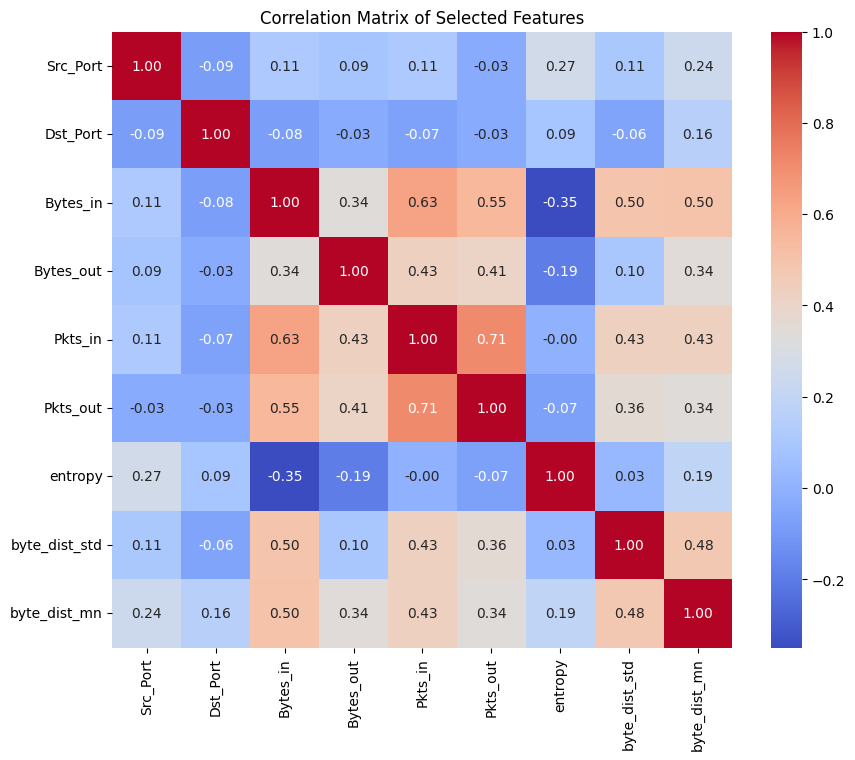

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

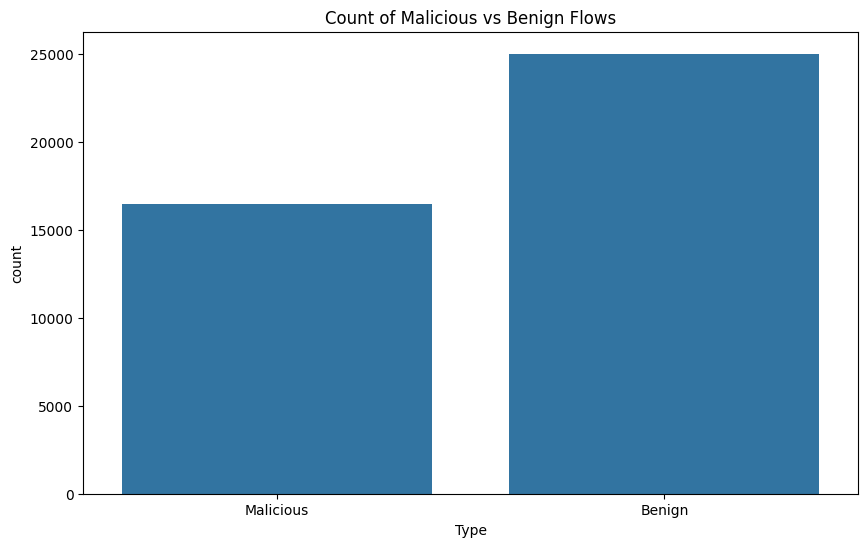

In [ ]:
# Count plot for flow types
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=combined_flows_subset)
plt.title('Count of Malicious vs Benign Flows')
plt.show()

# Data Preprocessing

In [ ]:
#Importing malicious and benign Datasets
malicious_dataset = pd.read_csv('malicious_flows.csv')
benign_dataset = pd.read_csv('sample_benign_flows.csv')

In [ ]:
# Combining both datasets together
all_flows = pd.concat([malicious_dataset, benign_dataset])

In [ ]:
# Removing duplicated rows from benign_dataset (5380 rows removed)
benign_dataset = benign_dataset[benign_dataset.duplicated(keep=False) == False]

In [ ]:
import numpy as np

#dataset with columns with nan values dropped
df = all_flows.drop(all_flows.columns[np.isnan(all_flows).any()], axis=1)

In [ ]:
# seterating indipendent variable from depencdent variable
reduced_y = df['isMalware']
reduced_x = df.drop(['isMalware'], axis=1)

# Data Normalization

In [ ]:
from sklearn import preprocessing

#scale data between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(reduced_x)

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting datasets into training and test data
x_train, x_test, y_train, y_test = train_test_split(x_scale, reduced_y, test_size=0.2, random_state=42)

# Baseline Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=200, random_state=42)

# Train the model on the training set
logreg_model.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, f1_score, log_loss

# Predict the labels of the test set
y_pred = logreg_model.predict(x_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_accuracy

0.9974203534115826

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
clf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels of the test set
y_pred = clf_model.predict(x_test)

# Evaluate the classifier
clf_accuracy = accuracy_score(y_test, y_pred)
clf_accuracy

0.9993550883528957

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k = 6
clf_cross_validation_scores = cross_val_score(clf, x_test, y_test, cv=k)

In [ ]:
# Calculate and print the average score across all folds
cross_validaion_average_score = clf_cross_validation_scores.mean()
cross_validaion_average_score

0.9981943137494342

# ANN Model

In [ ]:
import tensorflow as tf

# model generation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation ='relu', input_shape=(438,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [ ]:
#comipling the model
model.compile(optimizer ='adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])

In [ ]:
# visualizing the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                14048     
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15137 (59.13 KB)
Trainable params: 15137 (59.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fitting the model on the dataset
history = model.fit(x_train, y_train, batch_size=32, epochs = 5 ,verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
970/970 [==============================] - 4s 3ms/step - loss: 0.0390 - accuracy: 0.9860 - val_loss: 0.0144 - val_accuracy: 0.9933
Epoch 2/5
970/970 [==============================] - 3s 3ms/step - loss: 0.0098 - accuracy: 0.9964 - val_loss: 0.0104 - val_accuracy: 0.9974
Epoch 3/5
970/970 [==============================] - 6s 6ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.0101 - val_accuracy: 0.9973
Epoch 4/5
970/970 [==============================] - 7s 7ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.0097 - val_accuracy: 0.9974
Epoch 5/5
970/970 [==============================] - 8s 8ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0089 - val_accuracy: 0.9978


In [ ]:
#evaluating the model
ANN_model_accuracy = model.evaluate(x_test, y_test)
ANN_model_accuracy

243/243 [==============================] - 2s 7ms/step - loss: 0.0089 - accuracy: 0.9978


[0.00886229332536459, 0.9978073239326477]

# Evaluating different models

In [ ]:
logreg_accuracy, cross_validaion_average_score, ANN_model_accuracy

(0.9974203534115826,
 0.9981943137494342,
 [0.00886229332536459, 0.9978073239326477])

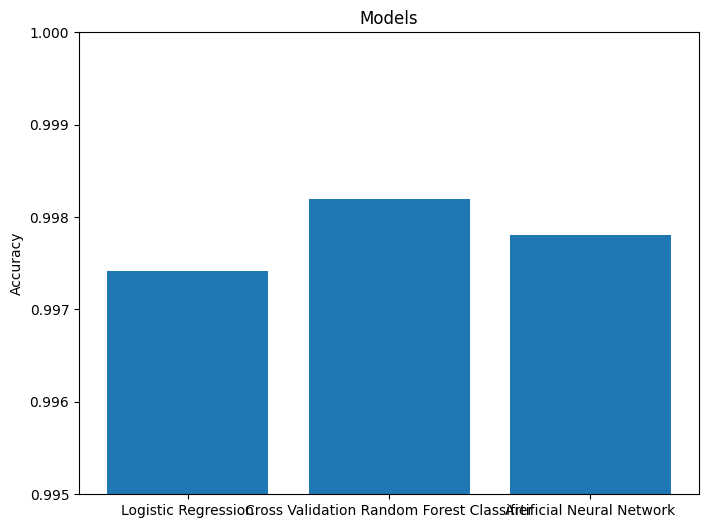

In [ ]:
# names of all the models
models = ['Logistic Regression', 'Cross Validation Random Forest Classifier', 'Artificial Neural Network']

# Accuracy values
accuracies = [logreg_accuracy, cross_validaion_average_score, ANN_model_accuracy[1]]

# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Models')
plt.ylim(0.995, 1.0)  # Adjusting the y-axis to better highlight the differences
plt.show()